In [1]:
import matplotlib.pyplot as plt

from exercises.part1.Non_Stationary_Environment import *
from exercises.part1.SWTS_Learner import *

In [2]:
n_arms = 4
p = np.array([[0.15, 0.1, 0.20, 0.35],
              [0.35, 0.25, 0.17, 0.30],
              [0.2, 0.15, 0.25, 0.1],
              [0.40, 0.50, 0.34, 0.67],
              [0.8, 0.16, 0.45, 0.2]])

T = 400

n_experiments = 1000
ts_rewards_per_experiment = []
swts_rewards_per_experiment = []

window_size = int(np.sqrt(T))

In [3]:
for e in range(0, n_experiments):

    ts_env = Non_Stationary_Environment(n_arms=n_arms, probabilities=p, horizon=T)
    ts_learner = TS_Learner(n_arms=n_arms)

    swts_env = Non_Stationary_Environment(n_arms=n_arms, probabilities=p, horizon=T)
    swts_learner = SWTS_Learner(n_arms=n_arms, window_size=window_size)

    for t in range(0, T):

        # Thompson Sampling Learner
        pulled_arm = ts_learner.pull_arm()
        reward = ts_env.round(pulled_arm)
        ts_learner.update(pulled_arm, reward)

        # Sliding Window Thompson Sampling Learner
        pulled_arm = swts_learner.pull_arm()
        reward = swts_env.round(pulled_arm)
        swts_learner.update(pulled_arm, reward)

    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    swts_rewards_per_experiment.append(swts_learner.collected_rewards)
    

In [4]:
ts_instantaneus_regret = np.zeros(T)
swts_instantaneus_regret = np.zeros(T)
n_phases = len(p)
phases_len = int(T / n_phases)

opt_per_phases = p.max(axis=1)
optimum_per_round = np.zeros(T)

In [5]:
for i in range(0, n_phases):
    optimum_per_round[i * phases_len:(i + 1) * phases_len] = opt_per_phases[i]

    ts_instantaneus_regret[i * phases_len:(i + 1) * phases_len] = opt_per_phases[i] - np.mean(
        ts_rewards_per_experiment, axis=0)[i * phases_len:(i + 1) * phases_len]
    swts_instantaneus_regret[i * phases_len:(i + 1) * phases_len] = opt_per_phases[i] - np.mean(
        swts_rewards_per_experiment, axis=0)[i * phases_len:(i + 1) * phases_len]

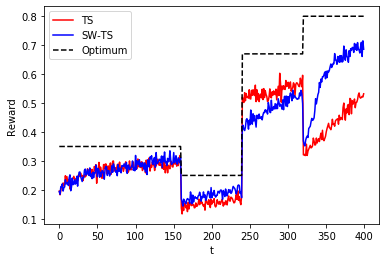

In [6]:
plt.ylabel('Reward')
plt.xlabel('t')
plt.plot(np.mean(ts_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(swts_rewards_per_experiment, axis=0), 'b')
plt.plot(optimum_per_round, '--k')
plt.legend(['TS', 'SW-TS', 'Optimum'])

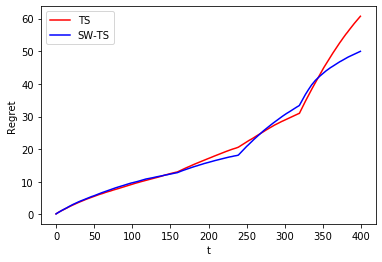

In [7]:
plt.ylabel('Regret')
plt.xlabel('t')
plt.plot(np.cumsum(ts_instantaneus_regret), 'r')
plt.plot(np.cumsum(swts_instantaneus_regret), 'b')
plt.legend(['TS', 'SW-TS'])
